# Project #3 - Predictive Analytics on Tapsell's Advertisement Dataset

#### This data is mainly provided for the task of click prediction in Mediaad digital advertising platform. Mediaad shows native ads on website pages. Each webpage has some places that serve the advertisements which is called widgets. Each widget can show single or multiple ads. The goal of this task is to predict whether a user will click on a specific ad or not.

#### In this notebook, you will be instructed to perform several steps of analysis in order to predict whether a user will click on an advertisement or not.

#### Click on <a href="https://drive.google.com/file/d/1tVYbSaG0JdxTLLPSAESnBNvj_RIxKg5B/view?usp=sharing">this link</a> to download the dataset and <a href="https://github.com/tapsellbrain/mediaad-dataset/wiki/Dataset-Description">this link</a> to get more information about the dataset. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%config Completer.use_jedi = False

## ➡️&nbsp; Loading The Dataset

**Load `event.csv`, `user_page_view.csv`, `creative.csv`, `click_train.csv`, and `creative_image.csv`. Check for any missing, duplicated, or unrelated values and handle them properly.**

In [ ]:
import tarfile
file = tarfile.open("/content/drive/MyDrive/data.tar.gz")
file.extractall("/content/drive/MyDrive/extracted")
file.close()

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import numpy as np
events_df =  pd.read_csv("/content/drive/MyDrive/extracted/csv_files_2/event.csv")
user_page_view_df =  pd.read_csv("/content/drive/MyDrive/extracted/csv_files_2/user_page_view.csv")
creative_df =  pd.read_csv("/content/drive/MyDrive/extracted/csv_files_2/creative.csv")
click_train_df =  pd.read_csv("/content/drive/MyDrive/extracted/csv_files_2/click_train.csv")
creative_image_df =  pd.read_csv("/content/drive/MyDrive/extracted/csv_files_2/creative_image.csv")

In [ ]:
print(events_df.isnull().sum())
print("--------------------------")
print(user_page_view_df.isnull().sum())
print("--------------------------")
print(creative_df.isnull().sum())
print("--------------------------")
print(click_train_df.isnull().sum())
print("--------------------------")
print(creative_image_df.isnull().sum())
print("**********************************")
events_df.drop_duplicates(keep='first')
user_page_view_df.drop_duplicates(keep='first')
creative_df.drop_duplicates(keep='first')
click_train_df.drop_duplicates(keep='first')
creative_image_df.drop_duplicates(keep='first')               

displayId    0
timestamp    0
docId        0
widgetId     0
userId       0
device       0
OS           0
browser      0
dtype: int64
--------------------------
userId       0
docId        0
timestamp    0
dtype: int64
--------------------------
creativeId      0
campaignId      0
advertiserId    0
dtype: int64
--------------------------
displayId     0
creativeId    0
clicked       0
dtype: int64
--------------------------
creativeId       0
imageFeatures    0
dtype: int64
**********************************


,creativeId,imageFeatures
0,7867,"[0.0524589940905571, 0.0, 0.04262353479862213,..."
1,7866,"[0.0032160670962184668, 0.1444239318370819, 0...."
2,7865,"[0.027210379019379616, 0.0, 0.5133526921272278..."
3,7863,"[0.0013980235671624541, 0.0, 0.0, 0.0455568209..."
4,7862,"[0.02426762878894806, 0.026081759482622147, 0...."
...,...,...
3251,13,"[0.14816689491271973, 0.04346756637096405, 1.3..."
3252,11,"[0.04297146946191788, 0.01642996445298195, 0.0..."
3253,8,"[0.15623298287391663, 0.00098716514185071, 0.0..."
3254,7,"[0.10627733916044235, 0.08754178136587143, 3.3..."


## ➡️&nbsp; EDA

**Find the top five advertisers with the most number of ads. How many advertisement campaigns does each one have?**

In [ ]:
temp  = creative_df["advertiserId"].value_counts()[:5].index
gp = creative_df.groupby(["advertiserId"])
for i in temp:
    unique = np.unique(gp.get_group(i)["campaignId"])
    print("advertiser Id:",i,"/number of ads : " ,gp.get_group(i).count()[0], "/number of campaigns : ", len(unique))

advertiser Id: 8414 /number of ads :  424 /number of campaigns :  6
advertiser Id: 6578 /number of ads :  181 /number of campaigns :  8
advertiser Id: 2167 /number of ads :  137 /number of campaigns :  14
advertiser Id: 7903 /number of ads :  109 /number of campaigns :  12
advertiser Id: 6973 /number of ads :  106 /number of campaigns :  12


**Which webpage (`docID`) received the biggest number of clicks? Which ads were displayed on that page?**

In [ ]:
merge = pd.merge(events_df,click_train_df,on="displayId")
docid = merge[merge.clicked == 1]["docId"].value_counts()[:1].index[0]
print("docId with biggest number of clicks: ",docid)
print("id of ads displayed:",merge[merge.docId==docid]["creativeId"].values)


docId with biggest number of clicks:  8116
id of ads displayed: [3344 2610 5003 ... 2404 6958 7179]


**Using `event.csv` and `click_train.csv` tables, find the top 100 users who have clicked on ads more that any other person. What type of device they were using?**

In [ ]:
userIDs= merge[merge.clicked==1]["userId"].value_counts()[:100].index
numberofClicks= merge[merge.clicked==1]["userId"].value_counts()[:100].values
for i in range(len(userIDs)):
  print("id: ",userIDs[i]," number of clicks: ",numberofClicks[i]," devices: ",merge[merge.userId==userIDs[i]]["device"].value_counts().index[0])
  print("-----------------------------")

id:  163374  number of clicks:  252  devices:  1
-----------------------------
id:  8409  number of clicks:  202  devices:  1
-----------------------------
id:  26033  number of clicks:  202  devices:  1
-----------------------------
id:  1356929  number of clicks:  153  devices:  1
-----------------------------
id:  80354  number of clicks:  150  devices:  1
-----------------------------
id:  49622  number of clicks:  122  devices:  1
-----------------------------
id:  414881  number of clicks:  114  devices:  1
-----------------------------
id:  121798  number of clicks:  96  devices:  1
-----------------------------
id:  230821  number of clicks:  94  devices:  1
-----------------------------
id:  327701  number of clicks:  88  devices:  1
-----------------------------
id:  294359  number of clicks:  83  devices:  1
-----------------------------
id:  144839  number of clicks:  78  devices:  0
-----------------------------
id:  268279  number of clicks:  75  devices:  0
-------------

## ➡️ Coversion Rate

**For each `creativeId` (a unique ID associated with each ad/creative) calculate how many times on average they were clicked on. We refer to this rate as "conversion rate". Draw a histogram of the conversion rates for all creativeId's.**

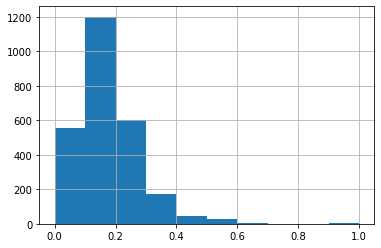

In [40]:
temp=pd.pivot_table(click_train_df,index=["creativeId"],values=["clicked"],aggfunc="mean")
temp.clicked.hist()

**For ads displayed to users with different device type (`device` in `event.csv`) calculated coversion rate? Do you observe any noticable difference between these groups?**

In [ ]:
temp = pd.pivot_table(merge,index=["device"],values=["clicked"],aggfunc="mean")
temp

,clicked
device,
0,0.241456
1,0.187116
2,0.216541
3,0.236328


**For ads displayed to users with different operating systems (`OS` in `event.csv`) calculated coversion rate? Do you observe any noticable difference between these groups?**

In [ ]:
temp = pd.pivot_table(merge,index=["OS"],values=["clicked"],aggfunc="mean")
temp

,clicked
OS,
0,0.242101
1,0.187086
2,0.227289
3,0.189579
4,0.187934
5,0.184848
6,0.240506


## ➡️ Coversion Rate Prediction

**Using `creative_image.csv` we would like to predict a creativeId's conversion rate given its image features. Create a feature matrix and a target vector. Each row in feature matrix corresponds to a sample in the dataset and each column is associated with a certain feature that is extracted from ad images.**

In [41]:
import ast 
temp=pd.pivot_table(click_train_df,index=["creativeId"],values=["clicked"],aggfunc="mean")
image_click_merged= pd.merge(temp,creative_image_df,on="creativeId",how= "outer")
image_click_merged.fillna(0,inplace=True)
image_click_merged.rename(columns={"clicked":"CoversionRate"},inplace=True)
image_click_merged["features"]= image_click_merged.imageFeatures.apply(lambda x : ast.literal_eval(x))
featureMatrix = pd.DataFrame(index = range(len(image_click_merged)))
for i in range(512):
     arr= image_click_merged.features.apply(lambda x : x[i])
     featureMatrix["F"+str(i)]=arr     
target = image_click_merged[["CoversionRate"]]
featureMatrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.


,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F502,F503,F504,F505,F506,F507,F508,F509,F510,F511
0,0.000000,0.000000,0.049760,0.407064,0.177637,0.071936,0.000000,0.000000,0.000000,0.001921,...,0.123998,0.454925,0.000000,0.010478,0.205283,0.000000,0.006869,0.366349,0.359391,0.000000
1,0.106277,0.087542,3.344223,0.645454,1.301556,0.121954,0.000000,0.000000,0.000000,0.049404,...,0.938022,0.733772,0.000000,1.211627,0.486232,0.000000,0.118570,0.079808,0.159126,0.012901
2,0.156233,0.000987,0.014774,0.207742,0.038036,0.011584,0.449074,0.066243,0.148653,0.325433,...,0.000000,0.000000,0.000000,0.441291,0.193914,0.639011,0.046036,0.000000,0.061070,0.125147
3,0.042971,0.016430,0.070029,0.000000,0.562984,0.223415,1.144221,0.630494,0.123705,0.154114,...,0.058076,0.099905,1.024207,0.749125,0.017977,1.022663,2.738049,0.022185,0.135937,0.710172
4,0.148167,0.043468,1.341706,1.226016,0.379946,0.173325,0.401060,0.134567,0.000000,0.011323,...,0.693747,0.011229,0.093873,0.353185,0.941742,0.000000,0.555764,0.223577,0.071369,0.018053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,0.943973,0.465581,0.116823,0.108319,0.117974,0.386769,0.759675,0.009138,0.280676,0.071453,...,0.654081,0.448365,0.324921,0.335183,0.276861,1.328668,0.167077,0.001378,1.013558,1.198405
3252,0.024743,0.000000,0.045342,0.309161,0.322709,0.000000,0.963467,0.132784,0.041715,0.291473,...,0.488894,0.499936,0.116464,1.575529,0.106088,0.003311,0.361591,0.000000,0.297544,0.093027
3253,0.021658,0.000000,0.025690,0.094007,0.591026,0.417503,0.605117,0.632903,0.018722,0.546322,...,0.232700,0.575909,0.138395,0.000000,0.119523,0.185274,0.283324,0.263859,0.088561,0.488359
3254,0.236970,0.156004,0.641770,0.115820,0.219936,0.131219,0.186142,0.404451,0.638187,0.000000,...,0.469910,0.104079,2.056196,2.302941,1.227027,0.328324,1.273884,0.037187,0.038545,0.164644


**Use a linear regression model to predict conversion rate given image features for each creativeId. Evaluate your model's performance using 5-fold cross-validation. Does adding polynomial features boost the performance? Use mean-squared-error as your evaluation metric.**

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin

model = LinearRegression()

kf = KFold(n_splits=5)
for train_index,test_index in kf.split(featureMatrix):
    X_train, X_test = featureMatrix.iloc[train_index], featureMatrix.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    model.fit(X_train,y_train)
    y_pred= model.predict(X_train)
    print("MSE train: ",mean_squared_error(y_train,y_pred))
    y_pred= model.predict(X_test)
    print("MSE test : ",mean_squared_error(y_test,y_pred))
    
    poly=PolynomialFeatures(degree=2)
    poly_features = poly.fit_transform(X_train)
    model= LinearRegression().fit(poly_features,y_train)
    y_pred= model.predict(poly.fit_transform(X_train))
    print("poly MSE train: ", mean_squared_error(y_train,y_pred))
    y_pred= model.predict(poly.fit_transform(X_test))
    print("poly MSE test: ", mean_squared_error(y_test,y_pred))
    print("---------------------------------")

MSE train:  0.01029681015832227
MSE test :  0.016233123465529478
poly MSE train:  0.001957188079829344
poly MSE test:  1.2507074352534744e+22
---------------------------------
MSE train:  0.010112475475986692
MSE test :  0.01744925169759266
poly MSE train:  0.0016223589328312634
poly MSE test:  1.5092322410116803e+21
---------------------------------
MSE train:  0.009761820730227492
MSE test :  0.018191971914225946
poly MSE train:  0.001510221233196113
poly MSE test:  2.3001782186554383e+21
---------------------------------
MSE train:  0.009642837048666255
MSE test :  0.019124212911465793
poly MSE train:  0.0016313825671916856
poly MSE test:  1.1046397854161633e+22
---------------------------------
MSE train:  0.007657726399295232
MSE test :  0.03910191053646363
poly MSE train:  0.0016327612165117852
poly MSE test:  1.9088806715362118e+21
---------------------------------


**Find a subset of image features that contain the most amount of information about the target values. You may use correlation matrix for this purpose.**

F305      0.082247
F133      0.082397
F126      0.086457
F316      0.086863
F250      0.088513
F365      0.090041
F125      0.092151
F496      0.093223
F464      0.094901
F404      0.100145
F326      0.100572
F394      0.106041
F230      0.107226
F495      0.109360
F114      0.109380
F287      0.111165
F136      0.112972
F469      0.115422
F333      0.119032
target    1.000000
Name: target, dtype: float64


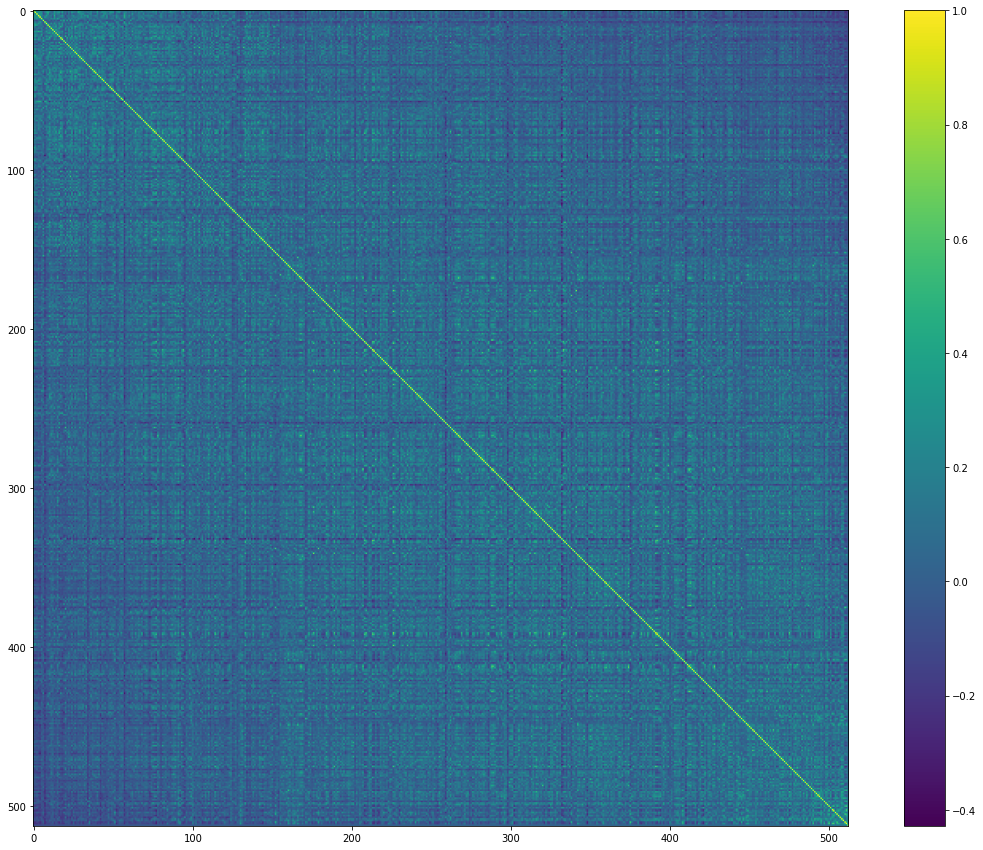

In [ ]:
featureMatrix["target"]=target
corr = featureMatrix.corr()
print(corr["target"].sort_values()[-20:])
help = corr.loc[corr["target"].sort_values().index,corr["target"].sort_values().index]
plt.figure(figsize=(20,15))
plt.imshow(help)
# plt.xticks(range(10),help.columns)
# plt.yticks(range(10),help.columns)
plt.colorbar()
plt.show()

**Apply PCA on image features. Plot a diagram to depict variance accross each calculated principle componenet. Choose a few principle components along which image features has to larget variance.**

[0.09952667 0.07810537 0.05050564 0.04358386 0.03746967 0.03185963
 0.02690029 0.02027288 0.01904353 0.01766871 0.01531184 0.01490987
 0.01398263 0.01366704 0.0114441  0.0114292  0.01100588 0.01015543
 0.00959954 0.00874146 0.00832805 0.00818001 0.00753147 0.00735408
 0.00714008 0.00699018 0.00645493 0.00616415 0.00601098 0.00584782]


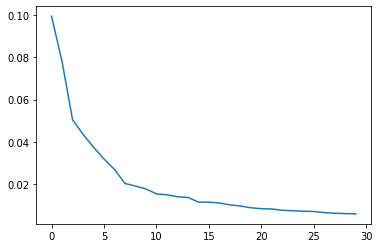

In [31]:
from sklearn.decomposition import PCA


pca = PCA(n_components=30) 
pca.fit_transform(featureMatrix)

print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)

**Construct a linear regression model and fit the model on the transformed image features you calculated previously. Evaluate your model's performance using 5-fold cross-validation. Does transforming data using PCA help increase model's performance?**

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()

kf = KFold(n_splits=5)
for train_index,test_index in kf.split(featureMatrix):
    X_train, X_test = featureMatrix.iloc[train_index], featureMatrix.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    scaler = StandardScaler()
    scaler.fit(X_train)
    #-------------------------------
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    pca = PCA(n_components=30)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

    model.fit(X_train,y_train)
    y_pred= model.predict(X_train)
    print("MSE train: ",mean_squared_error(y_train,y_pred))
    y_pred= model.predict(X_test)
    print("MSE test : ",mean_squared_error(y_test,y_pred))
    
    poly=PolynomialFeatures(degree=2)
    poly_features = poly.fit_transform(X_train)
    model= LinearRegression().fit(poly_features,y_train)
    y_pred= model.predict(poly.fit_transform(X_train))
    print("poly MSE train: ", mean_squared_error(y_train,y_pred))
    y_pred= model.predict(poly.fit_transform(X_test))
    print("poly MSE test: ", mean_squared_error(y_test,y_pred))
    print("---------------------------------")

MSE train:  0.014501888045542932
MSE test :  0.01147805495410045
poly MSE train:  0.010274734613073594
poly MSE test:  0.018724358602163205
---------------------------------
MSE train:  0.014091287398300671
MSE test :  0.013400098827489368
poly MSE train:  0.00993358462058523
poly MSE test:  0.021078840890732066
---------------------------------
MSE train:  0.013420020046212755
MSE test :  0.015783074759768534
poly MSE train:  0.009727064827306064
poly MSE test:  0.019360021465539907
---------------------------------
MSE train:  0.013756517681571897
MSE test :  0.014109594348971318
poly MSE train:  0.009391295567839216
poly MSE test:  0.02166733722816847
---------------------------------
MSE train:  0.010976824535219991
MSE test :  0.03270995773679667
poly MSE train:  0.007815927936654471
poly MSE test:  0.04819242681907727
---------------------------------
